IMPORTING LIBRARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [2]:
df = pd.read_csv("amazon_alexa.tsv",delimiter='\t')
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [3]:
df.dropna(inplace=True)

In [4]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

feedback
1    2893
0     256
Name: count, dtype: int64


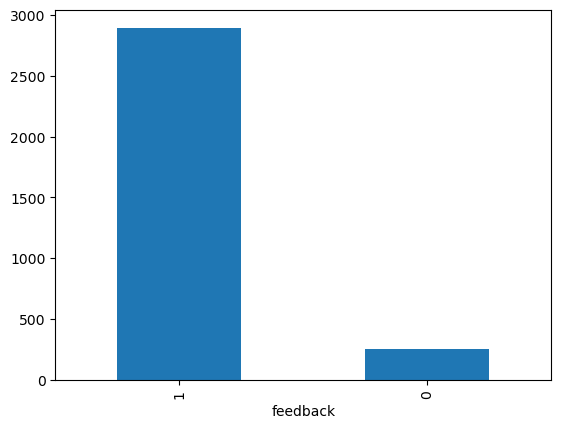

In [5]:
print(df.feedback.value_counts())
df.feedback.value_counts().plot(kind='bar')
plt.show()

DATA IMBALANCE

In [6]:
# POSITIVE REVIEWS
df[df['feedback']==1]

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [7]:
# NEGATIVE REVIEWS
df[df['feedback']==0]

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


PREPROCESSING

In [ ]:
corpus = []
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
custom_stopwords = set(STOPWORDS) - {'not'}
for i in range(0,df.shape[0]):
    review = re.sub('[^a-zA-Z]',' ',df.iloc[i]['verified_reviews'])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if not word in custom_stopwords]
    review = ' '.join(review)
    corpus.append(review)

In [9]:
X = corpus
y = df['feedback']

In [10]:
print(f"X shape: {np.array(X).shape}")
print(f"y shape: {np.array(y).shape}")

X shape: (3149,)
y shape: (3149,)


VECTORIZING AND SCALING

In [11]:
tfidf = TfidfVectorizer(max_features=2000)
X_tfidf = tfidf.fit_transform(X).toarray()

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X_tfidf)

SMOTE IS USED TO ADRESS CLASS IMBALANCE IN THE DATASET

In [13]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(scaled, y)

In [14]:
print(f"X_resampled: {X_resampled.shape}")
print(f"y_resampled: {y_resampled.shape}")

X_resampled: (5786, 2000)
y_resampled: (5786,)


Balanced Data

In [15]:
y_resampled.value_counts()

feedback
1    2893
0    2893
Name: count, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [17]:
print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (4628, 2000)
y train: (4628,)
X test: (1158, 2000)
y test: (1158,)


Model Training

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 0.9738547968885047
Testing Accuracy : 0.959412780656304


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       567
           1       1.00      0.92      0.96       591

    accuracy                           0.96      1158
   macro avg       0.96      0.96      0.96      1158
weighted avg       0.96      0.96      0.96      1158



CONFUSION MATRIX FOR TRAINING DATA

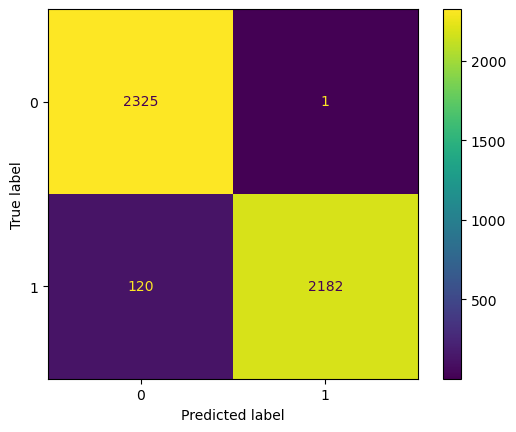

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_preds = model.predict(X_train)
cm = confusion_matrix(y_train, y_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
cm_display.plot()
plt.show()

CONFUSION MATRIX FOR TEST DATA

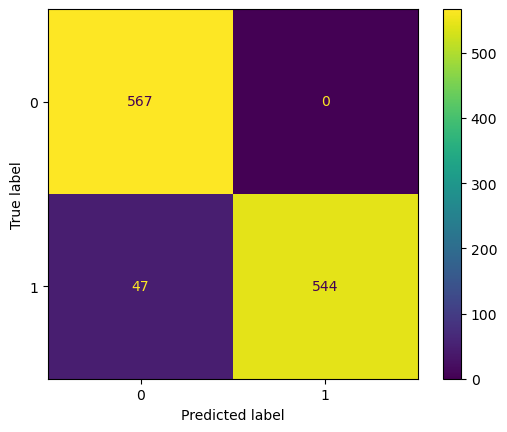

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_preds = model.predict(X_test)
cm = confusion_matrix(y_test, y_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
cm_display.plot()
plt.show()

SAVING MODEL, VECTORIZER AND SCALER INTO PICKLE FILES

In [24]:
import pickle
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)

with open('sentiment_model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)